In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("/home/zack83/Dropbox/Tripura_University/Project_Final/Databases/Original_Databaes/hepatitis.csv")

In [3]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [4]:
df.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [6]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

age              0
bilirubin        0
alk_phosphate    0
sgot             0
albumin          0
protime          0
dtype: int64

In [7]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    
df.select_dtypes(include=('object')).isna().sum()

sex      0
class    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          155 non-null    bool   
 3   antivirals       155 non-null    bool   
 4   fatigue          155 non-null    bool   
 5   malaise          155 non-null    bool   
 6   anorexia         155 non-null    bool   
 7   liver_big        155 non-null    bool   
 8   liver_firm       155 non-null    bool   
 9   spleen_palpable  155 non-null    bool   
 10  spiders          155 non-null    bool   
 11  ascites          155 non-null    bool   
 12  varices          155 non-null    bool   
 13  bilirubin        155 non-null    float64
 14  alk_phosphate    155 non-null    float64
 15  sgot             155 non-null    float64
 16  albumin          155 non-null    float64
 17  protime         

In [9]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,61.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,61.0,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,61.0,False,live
3,31,female,True,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,85.0,200.0,4.0,61.0,False,live


In [10]:
df['sex'] = df['sex'].replace({'male':0, 'female':1})
df['steroid'] = df['steroid'].replace({'false':0, 'true':1})
df['antivirals'] = df['antivirals'].replace({'False':0, 'True':1})
df['fatigue'] = df['fatigue'].replace({'False':0, 'True':1})
df['malaise'] = df['malaise'].replace({'False':0, 'True':1})
df['anorexia'] = df['anorexia'].replace({'False':0, 'True':1})
df['liver_big'] = df['liver_big'].replace({'False':0, 'True':1})
df['liver_firm'] = df['liver_firm'].replace({'False':0, 'True':1})
df['spleen_palpable'] = df['spleen_palpable'].replace({'False':0, 'True':1})
df['spiders'] = df['spiders'].replace({'False':0, 'True':1})
df['ascites'] = df['ascites'].replace({'False':0, 'True':1})
df['varices'] = df['varices'].replace({'False':0, 'True':1})
df['histology'] = df['histology'].replace({'False':0, 'True':1})
df['class'] = df['class'].replace({'live':0, 'die':1})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    int64  
 2   steroid          155 non-null    bool   
 3   antivirals       155 non-null    bool   
 4   fatigue          155 non-null    bool   
 5   malaise          155 non-null    bool   
 6   anorexia         155 non-null    bool   
 7   liver_big        155 non-null    bool   
 8   liver_firm       155 non-null    bool   
 9   spleen_palpable  155 non-null    bool   
 10  spiders          155 non-null    bool   
 11  ascites          155 non-null    bool   
 12  varices          155 non-null    bool   
 13  bilirubin        155 non-null    float64
 14  alk_phosphate    155 non-null    float64
 15  sgot             155 non-null    float64
 16  albumin          155 non-null    float64
 17  protime         

In [12]:
df['class'].value_counts()

class
0    123
1     32
Name: count, dtype: int64

In [13]:
#converting object values to numeric values
cat_cols = df.select_dtypes(include = ['object', 'bool']).columns.to_list()
cat_cols

['steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'histology']

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])

cat_cols = df.select_dtypes(include = ['object', 'bool']).columns.to_list()
cat_cols

[]

In [15]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,0,0,0,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,61.0,0,0
1,50,1,0,0,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,61.0,0,0
2,78,1,1,0,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,61.0,0,0
3,31,1,1,1,0,0,0,1,0,0,0,0,0,0.7,46.0,52.0,4.0,80.0,0,0
4,34,1,1,0,0,0,0,1,0,0,0,0,0,1.0,85.0,200.0,4.0,61.0,0,0


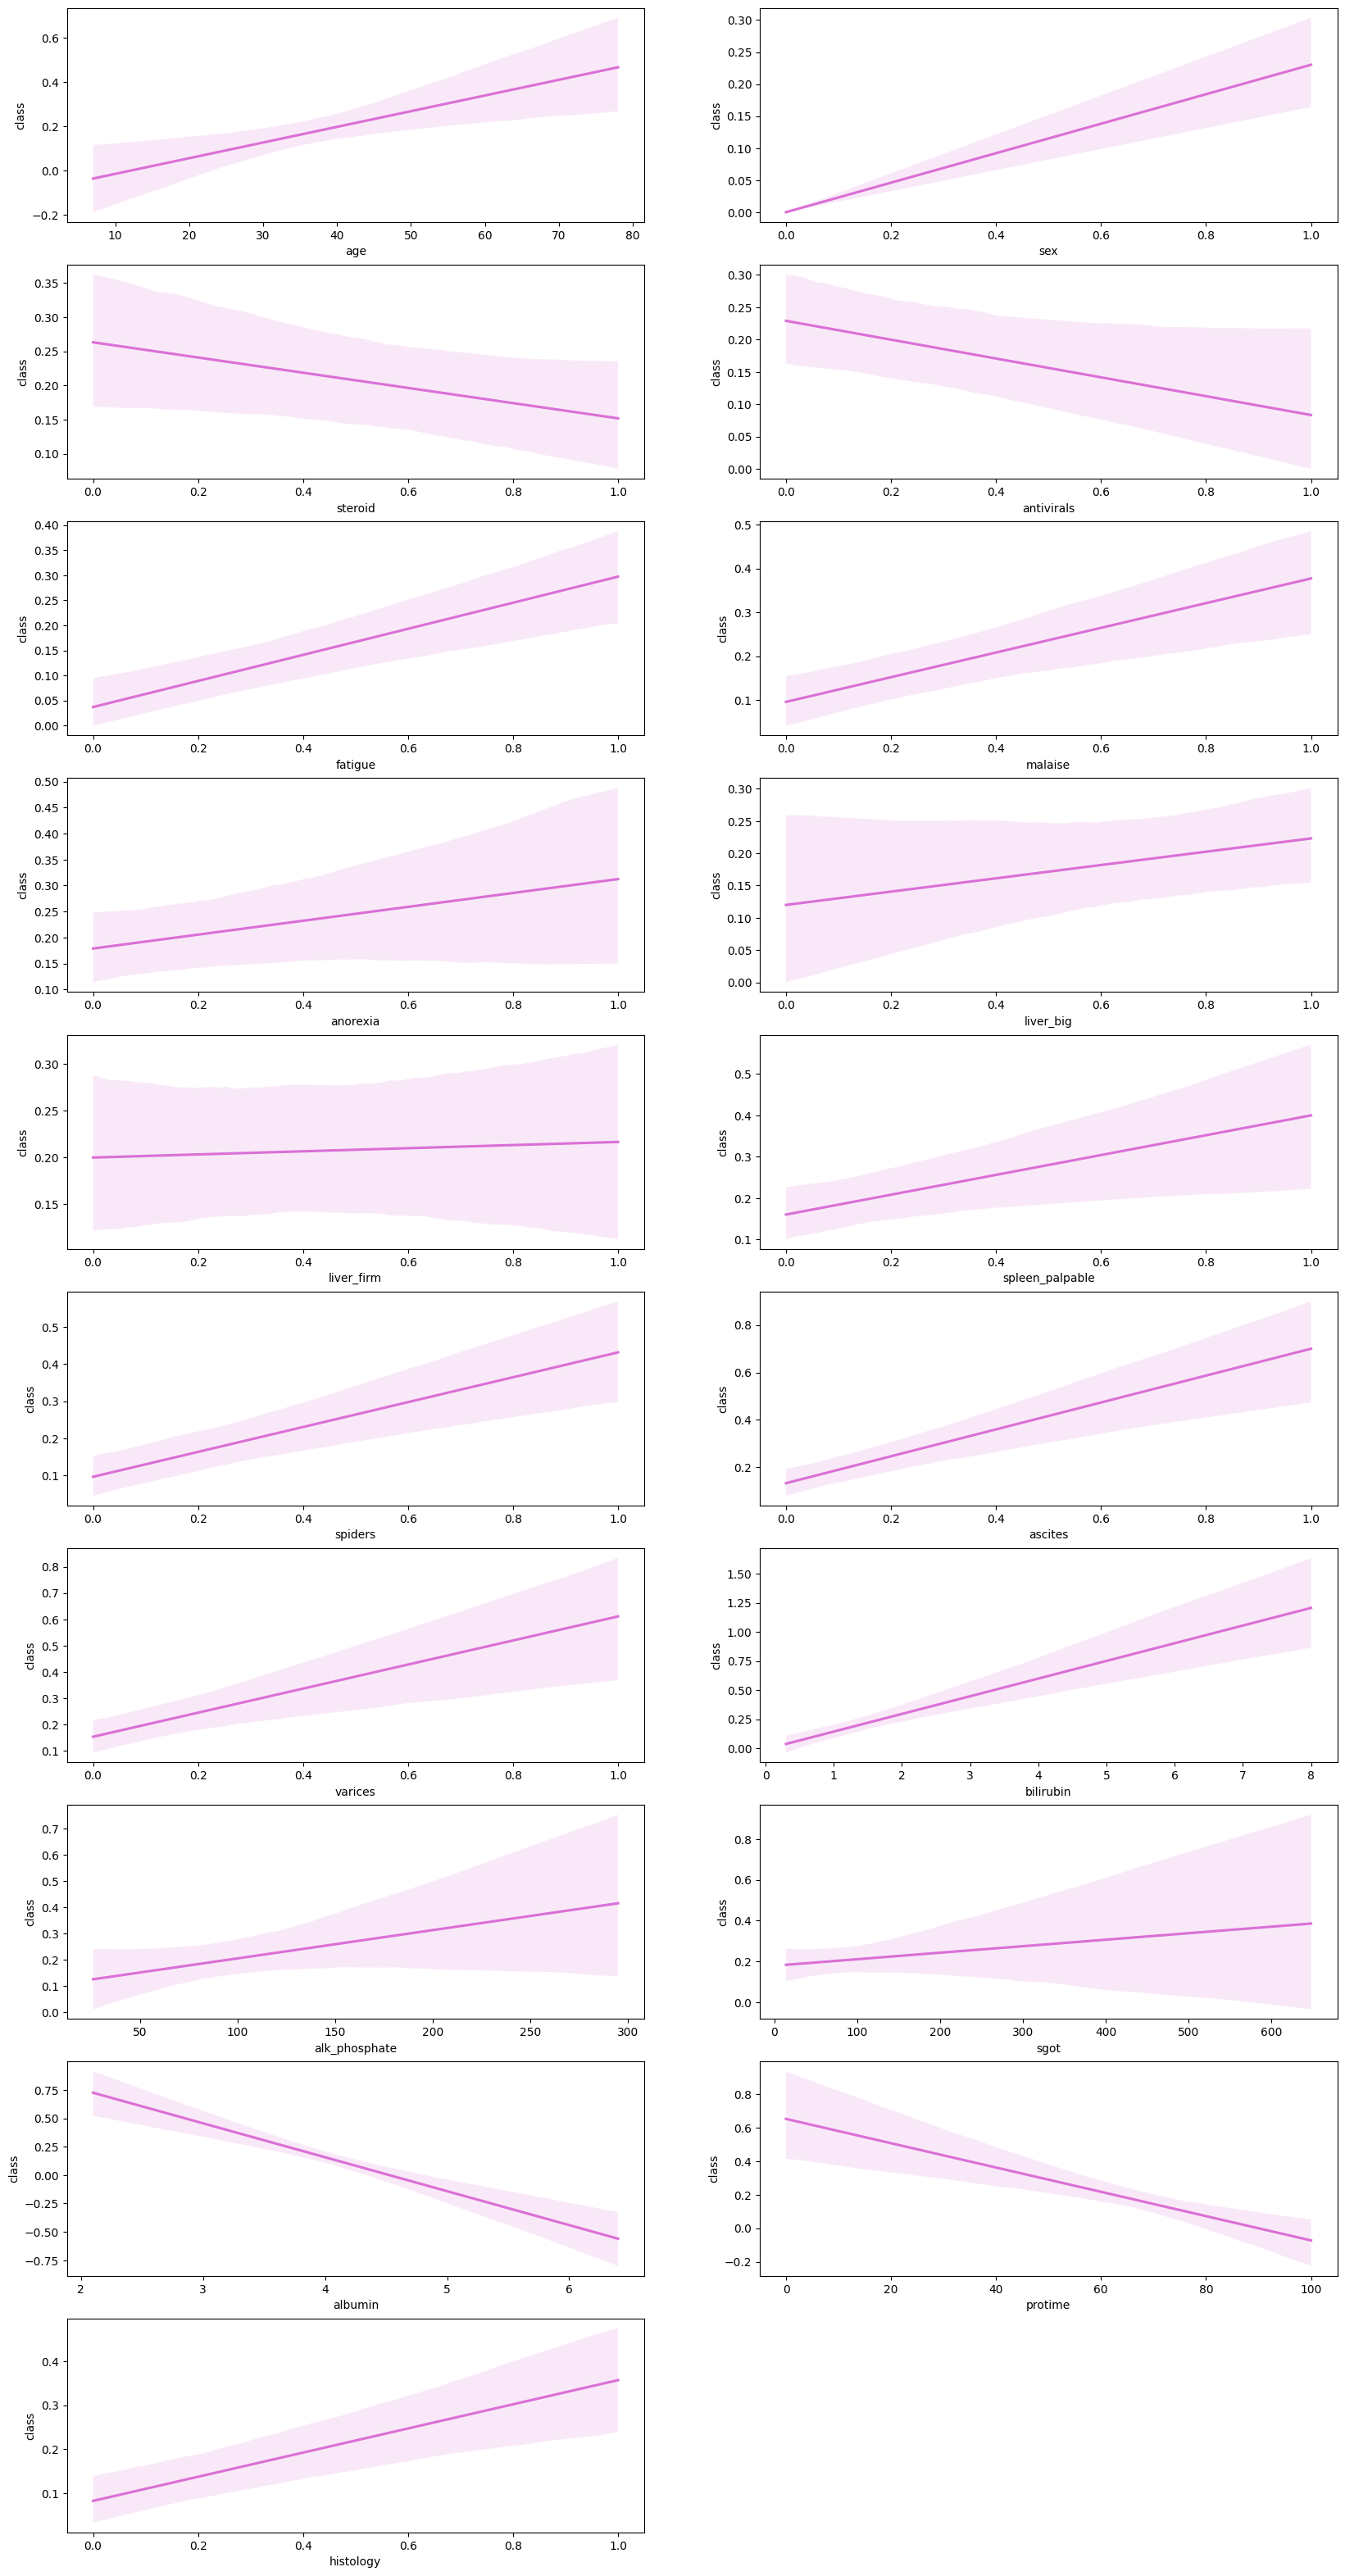

In [16]:
plt.figure(figsize = (20,40))
loop = df[["age",'sex','steroid','antivirals','fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices','bilirubin','alk_phosphate','sgot','albumin','protime','histology']]
i = 0
for c in loop:
    i +=1
    plt.subplot(10,2,i)
    sns.regplot(x = df[c],y = df["class"],scatter=False, color='orchid',)

In [17]:
X=df.drop(['class'],axis = 1)
y=df['class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.50, random_state = 0)

print("Train Shape: {}".format(X_train.shape))
print("Test Shape: {}".format(X_test.shape))

Train Shape: (77, 19)
Test Shape: (78, 19)


In [19]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)
score = dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_dtree))

Score of the model is -  0.7051282051282052
Report card of this model - 
              precision    recall  f1-score   support

           0      0.887     0.734     0.803        64
           1      0.320     0.571     0.410        14

    accuracy                          0.705        78
   macro avg      0.603     0.653     0.607        78
weighted avg      0.785     0.705     0.733        78

Accuracy score -  0.7051282051282052


In [20]:
dtree = DecisionTreeClassifier(max_depth = None , random_state = 1 , max_features = None, min_samples_leaf = 8)
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)
score = dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_dtree))

Score of the model is -  0.782051282051282
Report card of this model - 
              precision    recall  f1-score   support

           0      0.841     0.906     0.872        64
           1      0.333     0.214     0.261        14

    accuracy                          0.782        78
   macro avg      0.587     0.560     0.567        78
weighted avg      0.750     0.782     0.762        78

Accuracy score -  0.782051282051282


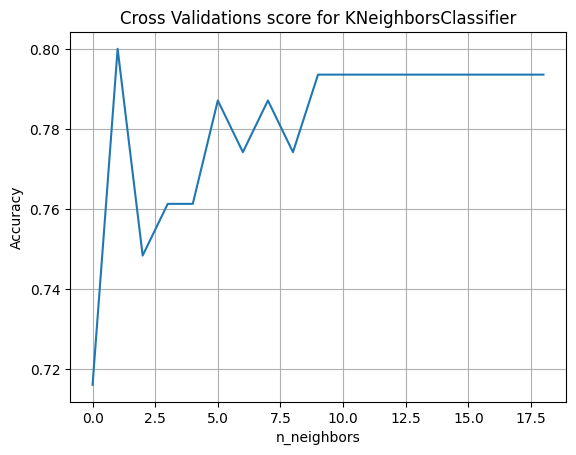

In [21]:
hist = []
for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(clf, X, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot(hist)
plt.title('Cross Validations score for KNeighborsClassifier')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
score = knn.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_knn, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_knn))

Score of the model is -  0.8076923076923077
Report card of this model - 
              precision    recall  f1-score   support

           0      0.827     0.969     0.892        64
           1      0.333     0.071     0.118        14

    accuracy                          0.808        78
   macro avg      0.580     0.520     0.505        78
weighted avg      0.738     0.808     0.753        78

Accuracy score -  0.8076923076923077


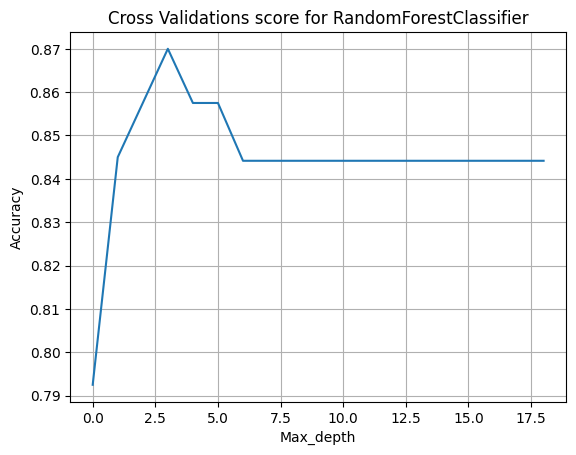

In [23]:
hist1 = []
for i in range(1,20):
    clf = RandomForestClassifier(n_estimators=80, max_depth=i, random_state=0)
    cross_val = cross_val_score(clf, X_train, y_train, cv=5)
    hist1.append(np.mean(cross_val))
plt.plot(hist1)
plt.title('Cross Validations score for RandomForestClassifier')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.grid()

In [24]:
ran_for = RandomForestClassifier(n_estimators=100, max_depth=3 , random_state=0)
ran_for.fit(X_train,y_train)
y_pred_ran = ran_for.predict(X_test)
score = ran_for.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_ran, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_ran))

Score of the model is -  0.8846153846153846
Report card of this model - 
              precision    recall  f1-score   support

           0      0.910     0.953     0.931        64
           1      0.727     0.571     0.640        14

    accuracy                          0.885        78
   macro avg      0.819     0.762     0.786        78
weighted avg      0.878     0.885     0.879        78

Accuracy score -  0.8846153846153846


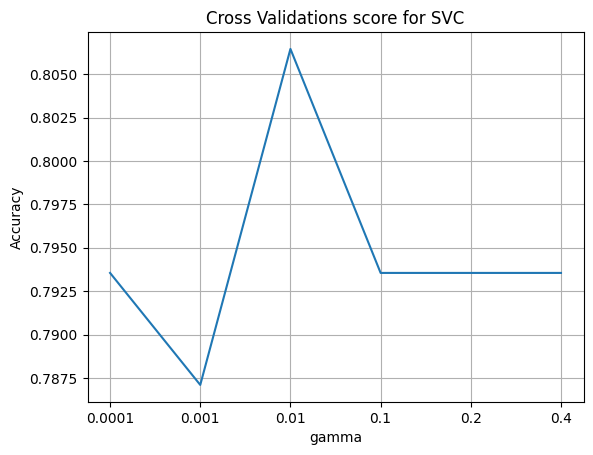

In [25]:
grid = [0.0001,0.001, 0.01, 0.1,0.2,0.4]
hist = []
for val in grid:
    clf = SVC(gamma=val)
    cross_val = cross_val_score(clf, X, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot([str(i) for i in grid], hist)
plt.title('Cross Validations score for SVC')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [26]:
svm = SVC(kernel= "linear",C=0.1, random_state = 0 , gamma=0.1)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
score = svm.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_svm, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_svm))

Score of the model is -  0.8589743589743589
Report card of this model - 
              precision    recall  f1-score   support

           0      0.921     0.906     0.913        64
           1      0.600     0.643     0.621        14

    accuracy                          0.859        78
   macro avg      0.760     0.775     0.767        78
weighted avg      0.863     0.859     0.861        78

Accuracy score -  0.8589743589743589


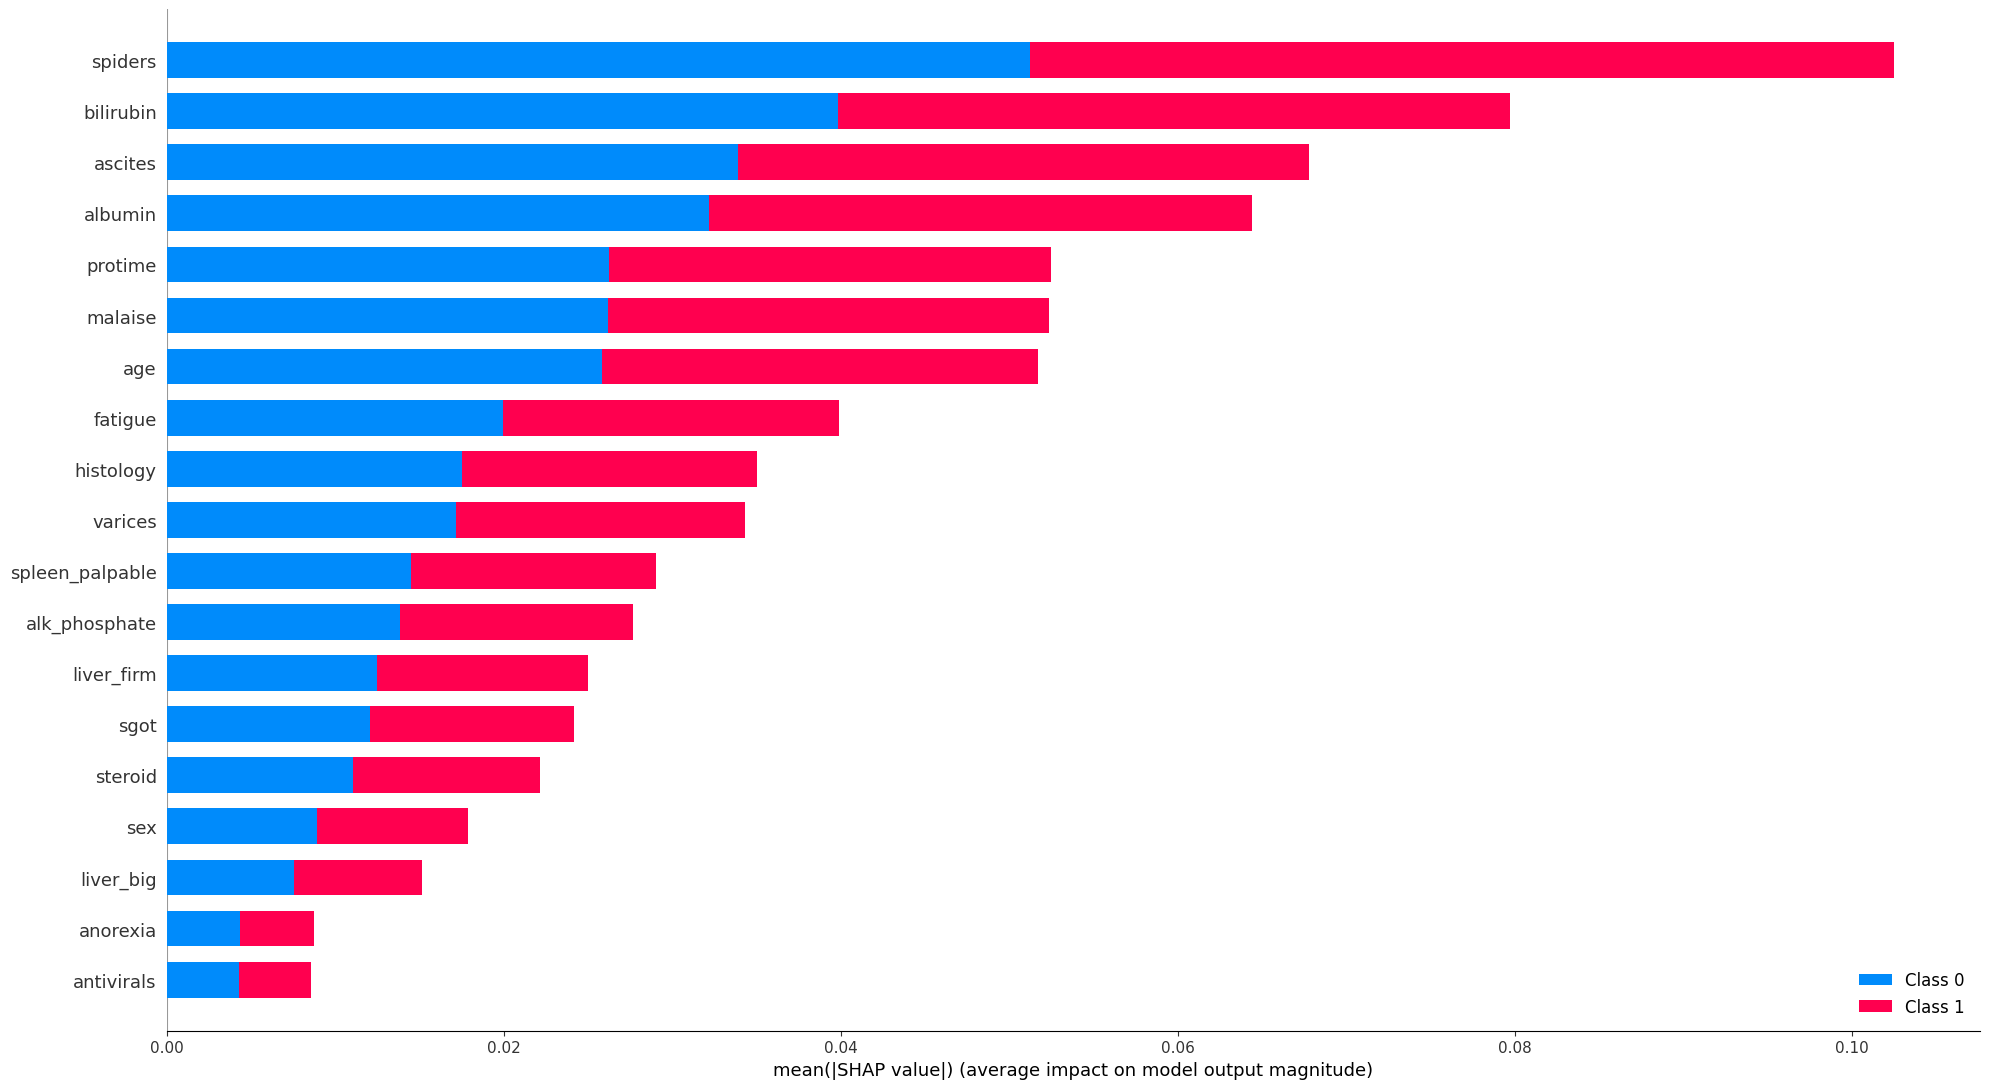

In [27]:
import shap
from sklearn.ensemble import RandomForestClassifier         # using random forest to explain for ease
rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)

rfc.fit(X, y)

explainer = shap.TreeExplainer(rfc)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_size=(20,11), alpha=0.2, plot_type='bar')

In [28]:
# df.to_csv('/home/zack83/Dropbox/Tripura_University/Project_Final/Databases/hepaTest000.csv',index = False)